In [2]:
import pandas as pd

df = pd.read_csv("/content/data_agg_final.csv")
df.head()

,Unnamed: 0,Открыт_дата,День недели,Месяц,Год,Неделя,ЗП,Время года,"Сумма по чеку, руб.",День,Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный
0,0,2022-09-01,3,9,2022,1,0,3,96630.0,1,11.4,0,0,False,1,1,0.0
1,1,2022-09-02,4,9,2022,1,0,3,108024.5,2,10.5,0,1,False,0,0,0.0
2,2,2022-09-03,5,9,2022,1,0,3,122352.0,3,12.5,0,0,False,0,0,0.0
3,3,2022-09-04,6,9,2022,1,0,3,119441.7,4,12.2,0,0,False,0,0,0.0
4,4,2022-09-05,0,9,2022,1,0,3,87863.5,5,10.3,0,0,False,0,0,0.0


In [3]:
df["Открыт_дата"] = pd.to_datetime(df["Открыт_дата"], dayfirst = True)
df['Праздник_вых'] = df['Праздник_вых'].astype(int)
df["Предпраздничный"] = df["Предпраздничный"].astype(int)

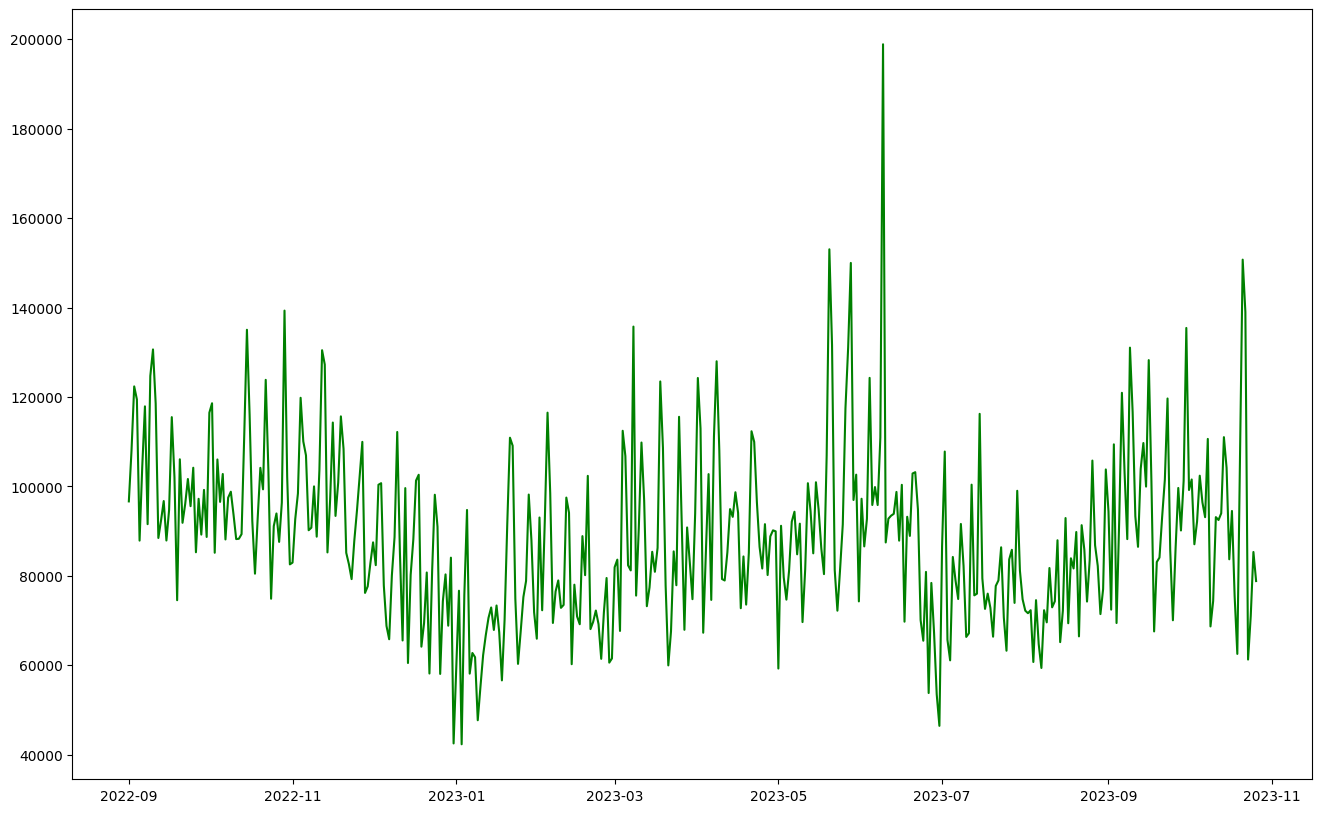

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.plot(df["Открыт_дата"], df["Сумма по чеку, руб."], color='green')
plt.show()

In [5]:
df.drop(columns = ["День", "Неделя", "Год"], inplace = True)
df.head()

,Unnamed: 0,Открыт_дата,День недели,Месяц,ЗП,Время года,"Сумма по чеку, руб.",Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный
0,0,2022-09-01,3,9,0,3,96630.0,11.4,0,0,0,1,1,0
1,1,2022-09-02,4,9,0,3,108024.5,10.5,0,1,0,0,0,0
2,2,2022-09-03,5,9,0,3,122352.0,12.5,0,0,0,0,0,0
3,3,2022-09-04,6,9,0,3,119441.7,12.2,0,0,0,0,0,0
4,4,2022-09-05,0,9,0,3,87863.5,10.3,0,0,0,0,0,0


In [6]:
df.set_index("Открыт_дата", inplace = True)
df.head()

,Unnamed: 0,День недели,Месяц,ЗП,Время года,"Сумма по чеку, руб.",Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный
Открыт_дата,,,,,,,,,,,,,
2022-09-01,0,3,9,0,3,96630.0,11.4,0,0,0,1,1,0
2022-09-02,1,4,9,0,3,108024.5,10.5,0,1,0,0,0,0
2022-09-03,2,5,9,0,3,122352.0,12.5,0,0,0,0,0,0
2022-09-04,3,6,9,0,3,119441.7,12.2,0,0,0,0,0,0
2022-09-05,4,0,9,0,3,87863.5,10.3,0,0,0,0,0,0


In [7]:
df.shape

(420, 13)

<ipython-input-8-d535180a90c7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Сумма по чеку, руб."], shade=True, color="green")


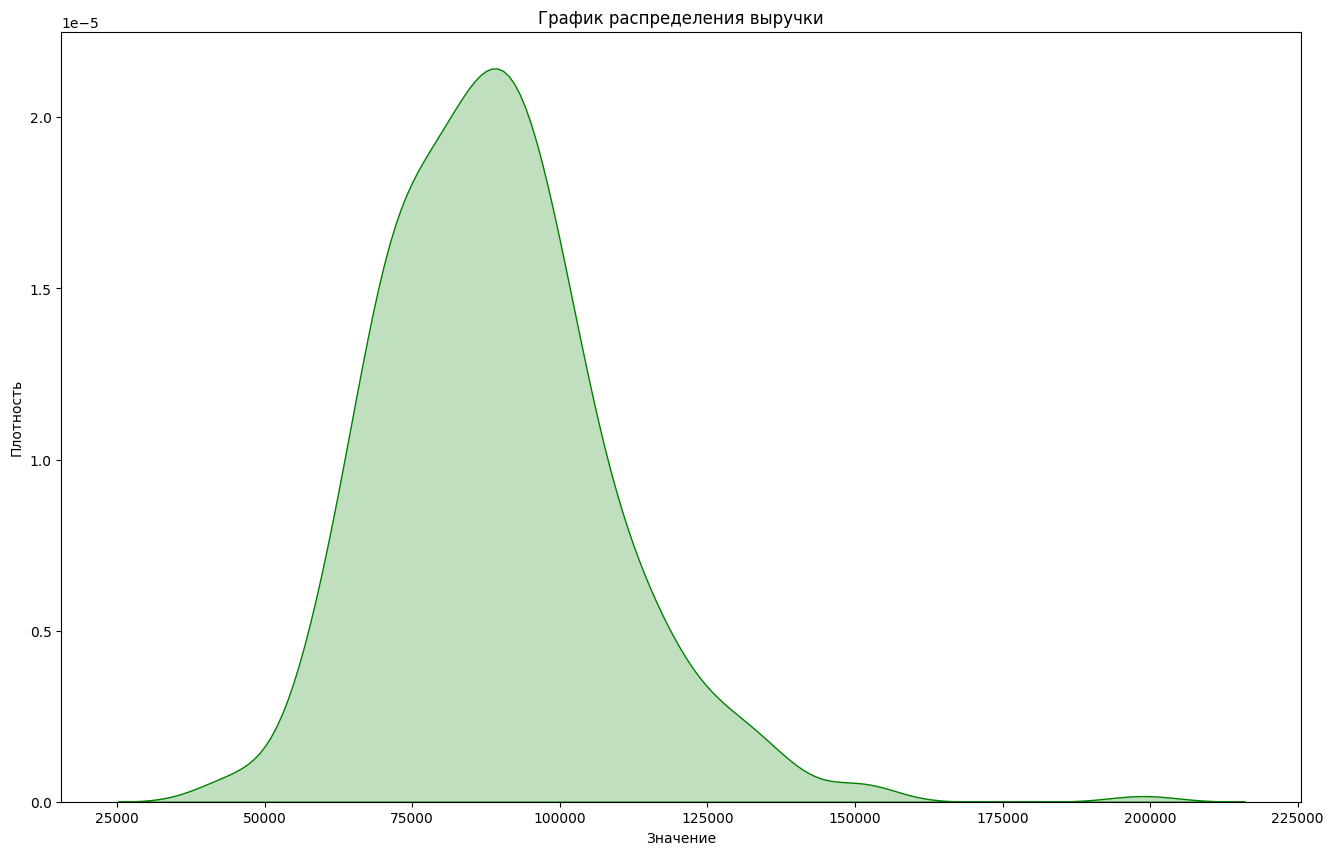

In [8]:
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.kdeplot(df["Сумма по чеку, руб."], shade=True, color="green")
plt.title("График распределения выручки")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.show()

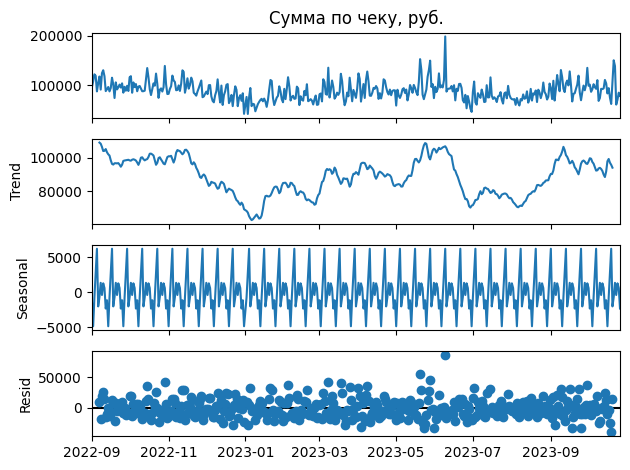

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Сумма по чеку, руб.'], model='additive', period = 12)

result.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def stationarity_check(data: np.array):

  adf_test = adfuller(data.values)
  p_value = adf_test[1]
  print(f"Значение теста: {adf_test[0]:.3f}")

  if p_value > 0.05:
    print("H0 - не отвергается, ряд нестационарен - требуется дифференциация")
  else:
    print("H0 - отвергается, ряд стационарен")


In [11]:
stationarity_check(df["Сумма по чеку, руб."])

Значение теста: -2.644
H0 - не отвергается, ряд нестационарен - требуется дифференциация


In [12]:
df_true = df["Сумма по чеку, руб."]
df_diff = df["Сумма по чеку, руб."].diff()

In [13]:
df_diff.dropna(inplace = True)

In [14]:
df_diff

Открыт_дата
2022-09-02    11394.50
2022-09-03    14327.50
2022-09-04    -2910.30
2022-09-05   -31578.20
2022-09-06    16575.00
                ...   
2023-10-22   -11708.48
2023-10-23   -77736.12
2023-10-24     9733.00
2023-10-25    14324.97
2023-10-26    -6505.47
Name: Сумма по чеку, руб., Length: 419, dtype: float64

In [15]:
stationarity_check(df_diff)

Значение теста: -9.220
H0 - отвергается, ряд стационарен


In [16]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [17]:
from pmdarima import auto_arima

model = auto_arima(df_diff,
                   d=None,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=9333.623, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9510.550, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9482.674, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9378.876, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=9340.011, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9345.358, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=9341.309, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=9335.860, Time=1.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9360.482, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=9335.925, Time=0.51 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9347.248, Time=0.43 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=9334.289, Time=2.52 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9335.502, Time=2.87 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 9.396 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  419
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4661.812
Date:                Sun, 04 Feb 2024   AIC                           9333.623
Time:                        19:35:45   BIC                           9353.813
Sample:                             0   HQIC                          9341.604
                                - 419                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8240      0.116      7.092      0.000       0.596       1.052
ar.L2         -0.3758      0.052     -7.226      0.000      -0.478      -0.274
ma.L1         -1.4763      0.116    -12.691      0.000      -1.704      -1.248
ma.L2          0.5752      0.105      5.498      0.000       0.370       0.780
sigma2      2.588e+08   5.87e-10   4.41e+17      0.000    2.59e+08    2.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               194.17
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+33. Standard errors may be unstable.
"""

In [18]:
df = df.iloc[1:]
df.head()

,Unnamed: 0,День недели,Месяц,ЗП,Время года,"Сумма по чеку, руб.",Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный
Открыт_дата,,,,,,,,,,,,,
2022-09-02,1,4,9,0,3,108024.5,10.5,0,1,0,0,0,0
2022-09-03,2,5,9,0,3,122352.0,12.5,0,0,0,0,0,0
2022-09-04,3,6,9,0,3,119441.7,12.2,0,0,0,0,0,0
2022-09-05,4,0,9,0,3,87863.5,10.3,0,0,0,0,0,0
2022-09-06,5,1,9,0,3,104438.5,9.7,0,1,0,0,0,0


In [19]:
final_df = df.merge(df_diff, left_index=True, right_index=True, how='inner')
final_df.drop(columns = ["Сумма по чеку, руб._x"], inplace = True)
final_df.head()

,Unnamed: 0,День недели,Месяц,ЗП,Время года,Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный,"Сумма по чеку, руб._y"
Открыт_дата,,,,,,,,,,,,,
2022-09-02,1,4,9,0,3,10.5,0,1,0,0,0,0,11394.5
2022-09-03,2,5,9,0,3,12.5,0,0,0,0,0,0,14327.5
2022-09-04,3,6,9,0,3,12.2,0,0,0,0,0,0,-2910.3
2022-09-05,4,0,9,0,3,10.3,0,0,0,0,0,0,-31578.2
2022-09-06,5,1,9,0,3,9.7,0,1,0,0,0,0,16575.0


In [20]:
final_df.rename(columns = {"Сумма по чеку, руб._y": "Сумма по чеку дифф"}, inplace = True)

In [21]:
train_size = int(len(final_df) * 0.8)
test_size = len(final_df) - train_size
test_index = final_df.shape[0] - test_size

train_df, test_df = final_df.iloc[:train_size], final_df.iloc[train_size:]


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df['Сумма по чеку дифф'],
                exog=train_df.drop(columns = ["Сумма по чеку дифф"]),
                order=(2, 0, 2),
                seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Сумма по чеку дифф   No. Observations:                  335
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -3737.260
Date:                Sun, 04 Feb 2024   AIC                           7508.521
Time:                        19:35:49   BIC                           7573.361
Sample:                             0   HQIC                          7534.371
                                - 335                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Unnamed: 0            -24.8940      6.263     -3.975      0.000     -37.169     -12.619
День недели          2482.0092    458.599      5.412      0.000    1583.172    3380.846
Месяц           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
def inverse_difference(data_true, data_diff):

    last_value = data_true
    recovered = [last_value]

    for change in data_diff:
        recovered.append(recovered[-1] + change)

    return recovered


In [24]:
train_df.shape, test_df.shape

((335, 13), (84, 13))

In [25]:
forecast = model_fit.forecast(steps = len(test_df), exog = test_df.drop(columns = ["Сумма по чеку дифф"]))
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


335    -3218.771643
336     2750.613099
337     6792.685775
338    -8908.696419
339    -6353.829789
           ...     
414    -3987.715566
415   -16064.283636
416   -14133.314238
417   -12763.188035
418   -12129.617641
Name: predicted_mean, Length: 84, dtype: float64

In [26]:
last_train_value = inverse_difference(df_true.values[train_size - 1], df_diff.values[:train_size])[-1]

In [27]:
last_train_value

47292.0

In [28]:
train_data = pd.Series(df_true[:train_size].values)
train_data.index = range(0, train_size)
test_data = pd.Series(df_true[train_size:].values)
test_data.index = range(train_size, train_size +  len(df_true[train_size:]))
pred_data = pd.Series(inverse_difference(last_train_value, forecast))
pred_data.index = range(train_size, train_size +  len(df_true[train_size:]))

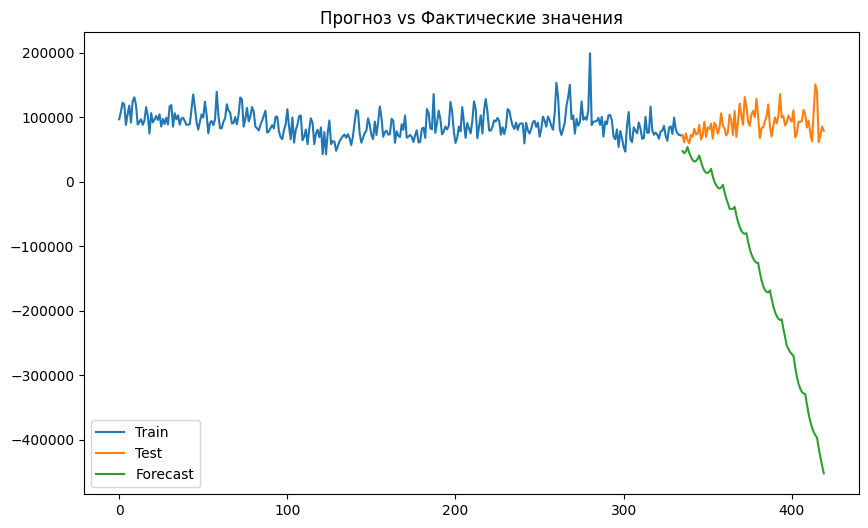

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_data, label='Forecast')
plt.title('Прогноз vs Фактические значения')
plt.legend()
plt.show()

In [30]:
df_true

Открыт_дата
2022-09-01     96630.00
2022-09-02    108024.50
2022-09-03    122352.00
2022-09-04    119441.70
2022-09-05     87863.50
                ...    
2023-10-22    138996.12
2023-10-23     61260.00
2023-10-24     70993.00
2023-10-25     85317.97
2023-10-26     78812.50
Name: Сумма по чеку, руб., Length: 420, dtype: float64

In [31]:
test_data

335     72297.00
336     60714.00
337     74543.50
338     64717.00
339     59377.00
         ...    
415    138996.12
416     61260.00
417     70993.00
418     85317.97
419     78812.50
Length: 85, dtype: float64

In [32]:
pred_data

335     47292.000000
336     44073.228357
337     46823.841456
338     53616.527231
339     44707.830812
           ...      
415   -396882.298584
416   -412946.582221
417   -427079.896459
418   -439843.084494
419   -451972.702135
Length: 85, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

print(f"RMSE {round(np.sqrt(mean_squared_error(test_data, pred_data)), 3)}")
print(f"MAE {round(mean_absolute_error(test_data, pred_data),3)}")
mean_absolute_percentage_error(test_data, pred_data)

RMSE 277130.238
MAE 230080.095


2.5326906314240114